In [1]:
import re
import pandas as pd
from pprint import pprint
from pytube import Channel, Playlist
from tqdm import tqdm

In [2]:
class NoPlaylistsFound(Exception):
    def __init__(self, message, errors=None):
        super().__init__(message, errors=errors)
        self.message = message
        self.errors = errors

In [7]:
class ChannelDataParser:
    
    def __init__(self, channel_url):
        self.channel_url = channel_url
        self._channel_info = []
        self.playlists = None
        
    @property
    def channel_info(self):
        return self._channel_info
    
    @channel_info.setter
    def channel_info(self, value):
        raise ValueError("cannot set value to chennel_info only populated")
        
    @property
    def channel_data(self):
        return pd.concat(self.channel_info, axis=0)
    
    @staticmethod
    def get_channel_playlists(channel_url):
        """
        function to get the playlists in a youtube channel.

        Args
        ----
         - channel_url (str) : the url of the youtube channel.

        Returns
        -------
         - playlists (list) : list of all unique playlists in the channel

        Raises
        ------
         - NoPlaylistsFound
        """

        ch = Channel(url=channel_url)

        playlists_html = ch.playlists_html

        pattern = re.compile(r'{"url":"/\w*\?list=\w*')

        playlists_uncleaned = re.findall(pattern, playlists_html)

        playlists_cleaned = set(map(lambda x: x.replace('{"url":"/', ""), playlists_uncleaned))

        if not playlists_cleaned:
            raise NoPlaylistsFound("No playlists found in this channel")

        return list(playlists_cleaned)
    
    @staticmethod
    def get_playlist_videos_info(playlist_url):
        """
        function parse videos from the playlist and gets their info.

        Args
        ----
         - playlist_url (str) : the url of the playlist.

        Returns
        -------
         - videos_info (list) : a 2D list containg a info about videos in the playlist
        """

        playlist_videos_data = dict(
            playlist_id=[], playlist_title=[], playlist_owner_id=[], playlist_length=[],
            playlist_views=[], video_id=[], video_title=[], video_views=[], video_length=[],
            video_desciption=[], video_keywords=[], video_rating=[],
        )

        ## base url of the youtube for the playlists
        YOUTUBE_BASE = "https://www.youtube.com/"

        playlist_url = YOUTUBE_BASE + playlist_url

        try:

            playlist = Playlist(url=playlist_url)

            for video in tqdm(playlist.videos):

                try:
                    playlist_videos_data["playlist_id"].append(playlist.playlist_id)
                    playlist_videos_data["playlist_title"].append(playlist.title)
                    playlist_videos_data["playlist_owner_id"].append(playlist.owner_id)
                    playlist_videos_data["playlist_length"].append(playlist.length)
                    playlist_videos_data["playlist_views"].append(playlist.views)

                    playlist_videos_data["video_id"].append(video.video_id)
                    playlist_videos_data["video_title"].append(video.title)
                    playlist_videos_data["video_views"].append(video.views)
                    playlist_videos_data["video_length"].append(video.length)
                    playlist_videos_data["video_desciption"].append(video.description)
                    playlist_videos_data["video_keywords"].append(video.keywords)
                    playlist_videos_data["video_rating"].append(video.rating)
                except Exception as e:
                    playlist_videos_data["playlist_id"].append(None)
                    playlist_videos_data["playlist_title"].append(None)
                    playlist_videos_data["playlist_owner_id"].append(None)
                    playlist_videos_data["playlist_length"].append(None)
                    playlist_videos_data["playlist_views"].append(None)

                    playlist_videos_data["video_id"].append(None)
                    playlist_videos_data["video_title"].append(None)
                    playlist_videos_data["video_views"].append(None)
                    playlist_videos_data["video_length"].append(None)
                    playlist_videos_data["video_desciption"].append(None)
                    playlist_videos_data["video_keywords"].append(None)
                    playlist_videos_data["video_rating"].append(None)

        except Exception as e:
            print(f"[ERROR] {str(e)}")

        return playlist_videos_data
    
    def get_channel_data(self):
        """
        function to get video information of all playlists

        Args
        ----
         - playlists (list) : the playlists of the channel

        Returns
        -------
         - channel_data (pd.DataFrame) : all the data from playlists passed
        """
        
        self.playlists = self.get_channel_playlists(self.channel_url)
        
        for playlist in self.playlists:
            try:
                playlist_info = self.get_playlist_videos_info(playlist)
                playlist_data = pd.DataFrame(playlist_info)
                self.channel_info.append(playlist_data)
            except Exception as e:
                print(f"[ERROR] {str(e)}")

        return self.channel_data


In [8]:
MIT_URL = "https://www.youtube.com/c/mitocw/"
ch = ChannelDataParser(channel_url=MIT_URL)
ch_data = ch.get_channel_data()

100%|█████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.52it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████| 20/20 [00:17<00:00,  1.17it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████| 14/14 [00:14<00:00,  1.04s/it]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████| 25/25 [00:23<00:00,  1.06it/s]
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.32it/s]


[ERROR] All arrays must be of the same length


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 323.35it/s]


[ERROR] All arrays must be of the same length


0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.70it/s]


[ERROR] All arrays must be of the same length


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.86it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.75it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.66it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████| 35/35 [00:20<00:00,  1.70it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████| 24/24 [00:14<00:00,  1.69it/s]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 152.71it/s]


[ERROR] All arrays must be of the same length


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.29it/s]


[ERROR] All arrays must be of the same length


100%|███████████████████████████████████████████████████████████████| 31/31 [00:16<00:00,  1.88it/s]
0it [00:00, ?it/s]
  7%|████▎                                                           | 3/45 [00:53<12:22, 17.67s/it]


KeyboardInterrupt: 

In [13]:
ch_data = ch.channel_data
ch_data.head()

,playlist_id,playlist_title,playlist_owner_id,playlist_length,playlist_views,video_id,video_title,video_views,video_length,video_desciption,video_keywords,video_rating
0,PLUl4u3cNGP60_JNv2MmK3wkOt9syvfQWY,"MIT 18.404J Theory of Computation, Fall 2020",UCEBb1b_L6zDS3xTUrIALZOw,25.0,143631.0,9syvZr-9xwk,"1. Introduction, Finite Automata, Regular Expr...",125748.0,3634.0,"MIT 18.404J Theory of Computation, Fall 2020\n...","[finite automata, formal definition, regular l...",None
1,PLUl4u3cNGP60_JNv2MmK3wkOt9syvfQWY,"MIT 18.404J Theory of Computation, Fall 2020",UCEBb1b_L6zDS3xTUrIALZOw,25.0,143631.0,oNsscmUwjMU,"2. Nondeterminism, Closure Properties, Convers...",22500.0,3807.0,"MIT 18.404J Theory of Computation, Fall 2020\n...","[nondeterministic finite automata, regular lan...",None
2,PLUl4u3cNGP60_JNv2MmK3wkOt9syvfQWY,"MIT 18.404J Theory of Computation, Fall 2020",UCEBb1b_L6zDS3xTUrIALZOw,25.0,143631.0,KAySmSEGc9U,"3. Regular Pumping Lemma, Conversion of FA to ...",17745.0,4202.0,"MIT 18.404J Theory of Computation, Fall 2020\n...","[regular expressions, pumping lemma, non-regul...",None
3,PLUl4u3cNGP60_JNv2MmK3wkOt9syvfQWY,"MIT 18.404J Theory of Computation, Fall 2020",UCEBb1b_L6zDS3xTUrIALZOw,25.0,143631.0,m9eHViDPAJQ,"4. Pushdown Automata, Conversion of CFG to PDA...",15772.0,4162.0,"MIT 18.404J Theory of Computation, Fall 2020\n...","[context free grammars, context free languages...",None
4,PLUl4u3cNGP60_JNv2MmK3wkOt9syvfQWY,"MIT 18.404J Theory of Computation, Fall 2020",UCEBb1b_L6zDS3xTUrIALZOw,25.0,143631.0,IycOPFmEQk8,"5. CF Pumping Lemma, Turing Machines",14116.0,4439.0,"MIT 18.404J Theory of Computation, Fall 2020\n...","[pumping lemma, Turing machine, TM recognizers...",None


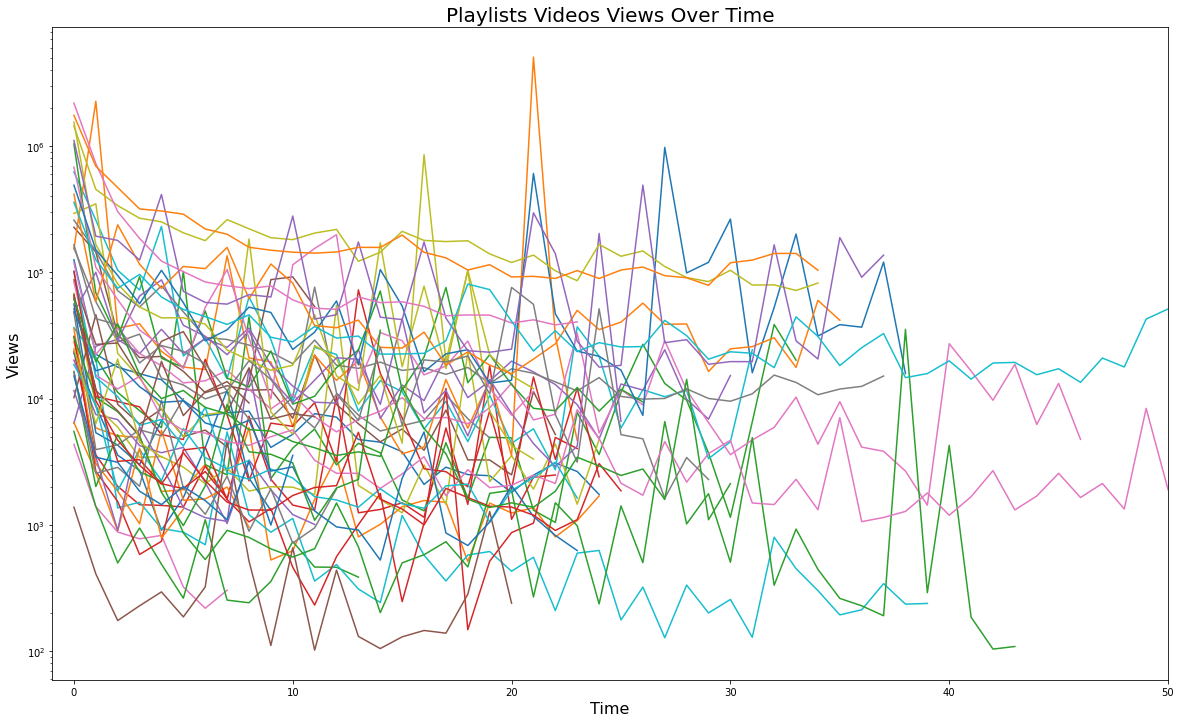

In [25]:
import matplotlib.pyplot as plt

unique_ids = ch_data["playlist_id"].unique()

plt.figure(figsize=(20, 12))
for playlist_id in unique_ids:
    plt.plot(ch_data[ch_data["playlist_id"] == playlist_id]["video_views"].values,
             label=playlist_id)
plt.yscale("log")
plt.xlim([-1, 50])
plt.ylabel("Views", fontsize=16)
plt.xlabel("Time", fontsize=16);
plt.title("Playlists Videos Views Over Time", fontsize=20);
plt.savefig("view_rate.jpg", dpi=200)